In [9]:
# Install library yang dibutuhkan
!pip install kagglehub pandas numpy matplotlib seaborn scikit-learn


Penjelasan:

Cell ini digunakan untuk menginstall semua library yang diperlukan untuk:

Mengambil dataset dari Kaggle

Mengolah data

Melatih model machine learning

Menampilkan visualisasi

In [10]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Penjelasan:

Digunakan untuk:

kagglehub → mengambil dataset Kaggle langsung di Colab

pandas → manipulasi data

numpy → operasi numerik

matplotlib & seaborn → visualisasi data

In [11]:
file_path = "diabetes.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/pima-indians-diabetes-database",
    file_path,
)

df.head()


/tmp/ipython-input-1128622108.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Penjelasan:

Mengambil dataset Pima Indians Diabetes Database langsung dari Kaggle ke Google Colab dan menampilkan 5 data teratas.

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Penjelasan:

Menampilkan:

Jumlah data

Nama kolom

Tipe data

Jumlah non-null

In [13]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Penjelasan:

Menampilkan statistik:

Mean

Min

Max

Std

Quartile

Digunakan untuk memahami karakteristik setiap fitur.

In [14]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Penjelasan:

Mengecek apakah ada data kosong (null).

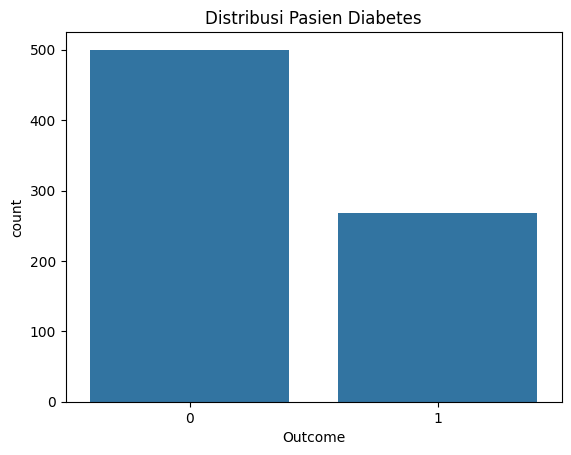

In [15]:
sns.countplot(x="Outcome", data=df)
plt.title("Distribusi Pasien Diabetes")
plt.show()


Penjelasan:

Menampilkan jumlah pasien:

Diabetes (1)

Tidak Diabetes (0)

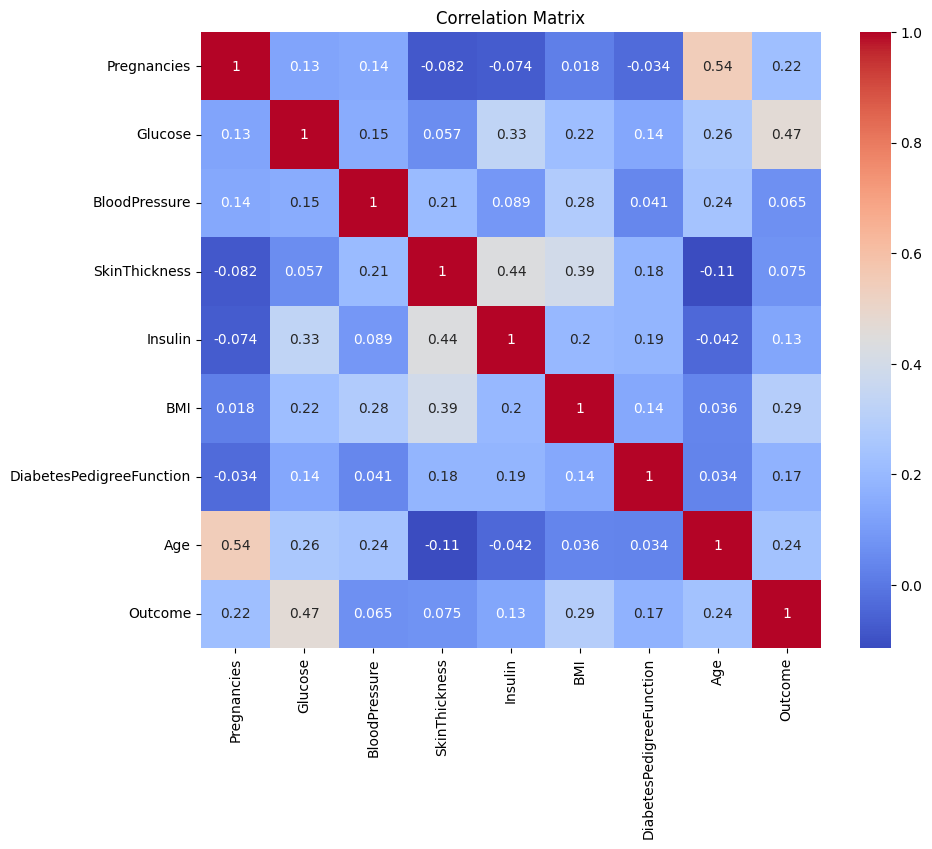

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Penjelasan:

Menampilkan hubungan antar fitur dalam bentuk heatmap.

In [17]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)


Penjelasan:

Nilai 0 pada fitur medis tidak logis, sehingga:

Diganti menjadi NaN

Diisi dengan nilai rata-rata kolom

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Penjelasan:

Membagi dataset menjadi:

80% data training

20% data testing

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Penjelasan:

Menstandarisasi data agar semua fitur berada dalam skala yang sama.

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


Penjelasan:

Melatih model Logistic Regression sebagai baseline classifier.

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


Penjelasan:

Melatih model Random Forest yang lebih kompleks dan kuat.

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [23]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.6948051948051948
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



In [24]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154



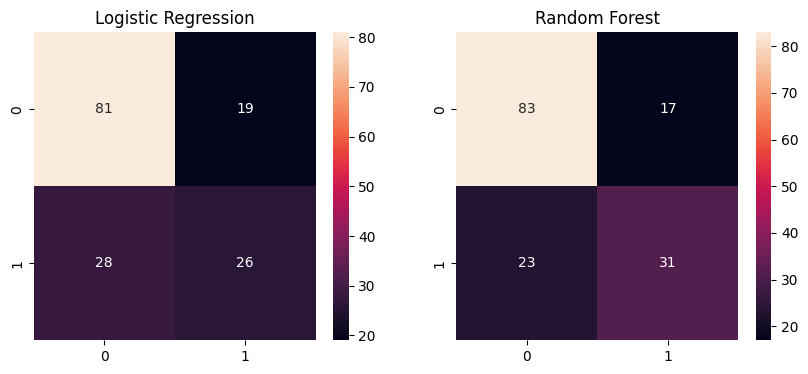

In [25]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d")
plt.title("Logistic Regression")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d")
plt.title("Random Forest")

plt.show()
